In [5]:
import map_functions

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gdf = gpd.read_file("data/sources/Hungary_2022_static_road_data.geojson")

In [6]:
geo_positions = {
    "Budapest": (47.497912, 19.040235),
    "Kecskemét": (46.906770, 19.691383),
    "Szeged": (46.253000, 20.141424),
    "Szolnok": (47.172424, 20.178190),
    "Debrecen": (47.531605, 21.627312),
    "Nyíregyháza": (47.955879, 21.716837),
    "Miskolc": (48.104385, 20.791731),
    "Dunaújváros": (46.961511, 18.940582),
    "Szekszárd": (46.348886, 18.706048),
    "Pécs": (46.072734, 18.232266),
    "Székesfehérvár": (47.186644, 18.422595),
    "Siófok": (46.911703, 18.040138),
    "Győr": (47.687453, 17.634782),
    "Sopron": (47.686567, 16.588856),
    "Szombathely": (47.130884, 16.621046),
    "div_point_Miskolc_Debrecen": (47.7, 20.2),
    "div_point_Debrecen_Nyíregyháza": (47.6, 20.8),
    "div_point_Sopron_Szombathely": (47.4, 17.2),
    "Veszprém": (47.093658, 17.911332)
}

#div_point_Miskolc_Debrecen: A division point between Miskolc and Debrecen, on the highway.
routes = [
    ["Budapest", "Kecskemét", "Szeged"], #M5
    ["Budapest", "Szolnok", "Debrecen", "Nyíregyháza"], #4
    ["Budapest", "div_point_Miskolc_Debrecen", "Miskolc", "Nyíregyháza"], #M3, M30, local roads + 3
    ["Budapest", "div_point_Miskolc_Debrecen", "div_point_Debrecen_Nyíregyháza", "Nyíregyháza"], #M3 + 3
    ["Budapest", "div_point_Miskolc_Debrecen", "div_point_Debrecen_Nyíregyháza", "Debrecen"], #M3, M35 + 3, 35
    ["Budapest", "Dunaújváros", "Szekszárd", "Pécs"], #M6
    ["Budapest", "Székesfehérvár", "Siófok"], #M7
    ["Budapest", "Győr","div_point_Sopron_Szombathely", "Sopron"], #M1, M85, local roads
    ["Budapest", "Győr","div_point_Sopron_Szombathely", "Szombathely"], #M1, M85, local roads
    #"Radial" routes
    ["Szolnok", "Kecskemét", "Dunaújváros", "Székesfehérvár", "Győr"], #M8, 52, 62, 81
    ["Dunaújváros", "Siófok", "Veszprém", "Győr"], #(other paths) (6+)61+64, 72 (or 71+73), 82
    ["Székesfehérvár", "Veszprém", "Szombathely"], #8, 8+84/86/87
    ["Szeged", "Pécs"] #55+56+ 57/M80
]

In [7]:
direct_routes = [(origin, destination) for route in routes for origin, destination in zip(route[:-1], route[1:])]

In [8]:
roads_ids = {#Excluding Pkod 2 helps keep bidirectional roads (pkod 0), and for unidirectional roads, only one direction is kept (pkod 1)
    "Budapest_Szolnok_M4": gdf[(gdf['kszam']=='M4') &  (gdf['pkod']!='2')][18:49]['id'].tolist(),
    "Budapest_Szolnok_4": gdf[(gdf['kszam']=='4' )& (gdf['pkod']!='2')][109:]['id'].tolist(),
    "Szolnok_Debrecen_4": gdf[(gdf['kszam']=='4' )& (gdf['pkod']!='2')][0:42]['id'].tolist(),
    "Debrecen_Nyíregyháza_4": gdf[(gdf['kszam']=='4' )& (gdf['pkod']!='2')][42:75]['id'].tolist(),

    "Budapest_Kecskemét_M5": gdf[((gdf['kszam']=='M5')) &  (gdf['pkod']!='2')][0:30]['id'].tolist(),
    "Budapest_Kecskemét_5": gdf[((gdf['kszam']=='5')) &  (gdf['pkod']!='2')][7:60]['id'].tolist(),
    "Kecskemét_Szeged_M5": gdf[((gdf['kszam']=='M5')) &  (gdf['pkod']!='2')][30:50]['id'].tolist(),
    "Kecskemét_Szeged_5": gdf[((gdf['kszam']=='5')) &  (gdf['pkod']!='2')][60:130]['id'].tolist(),

    "Budapest_div_point_Miskolc_Debrecen_M3": gdf[((gdf['kszam']=='M3')) & (gdf['pkod']!='2')][46:]['id'].tolist(),
    "Budapest_div_point_Miskolc_Debrecen_3": gdf[((gdf['kszam']=='3')) & (gdf['pkod']!='2')][0:99]['id'].tolist(),
    "div_point_Miskolc_Debrecen_Miskolc_M30": gdf[((gdf['kszam']=='M30')) & (gdf['pkod']!='2')]['id'].tolist(),
    "div_point_Miskolc_Debrecen_Miskolc_3": gdf[((gdf['kszam']=='3')) & (gdf['pkod']!='2')][99:125]['id'].tolist(),
    "div_point_Debrecen_Nyíregyháza_Nyíregyháza_M3": gdf[((gdf['kszam']=='M3')) & (gdf['pkod']!='2')][5:32]['id'].tolist(),
    "div_point_Miskolc_Debrecen_div_point_Debrecen_Nyíregyháza_M3": gdf[((gdf['kszam']=='M3')) & (gdf['pkod']!='2')][32:46]['id'].tolist(),
    "div_point_Miskolc_Debrecen_div_point_Debrecen_Nyíregyháza_35": gdf[((gdf['kszam']=='35')) & (gdf['pkod']!='2')][0:22]['id'].tolist(),
    "div_point_Miskolc_Debrecen_Debrecen_M35": gdf[((gdf['kszam']=='M35')) & (gdf['pkod']!='2')]['id'].tolist(),
    "div_point_Debrecen_Nyíregyháza_Debrecen_M35": gdf[((gdf['kszam']=='M35')) & (gdf['pkod']!='2')][:]['id'].tolist(),
    "div_point_Debrecen_Nyíregyháza_Debrecen_35": gdf[((gdf['kszam']=='35')) & (gdf['pkod']!='2')][22:]['id'].tolist(),
    "Miskolc_Nyíregyháza_37_38": gdf[(((gdf['kszam']=='37') & (gdf['pkod']!='2')))][0:34]['id'].tolist() + gdf[(((gdf['kszam']=='38')& (gdf['pkod']!='2')))]['id'].tolist(),

    "Budapest_Dunaújváros_M6": gdf[((gdf['kszam']=='M6')) & (gdf['pkod']!='2')][0:32]['id'].tolist(),
    "Budapest_Dunaújváros_6": gdf[((gdf['kszam']=='6')) & (gdf['pkod']!='2')][0:60]['id'].tolist(),
    "Dunaújváros_Szekszárd_M6": gdf[((gdf['kszam']=='M6')) & (gdf['pkod']!='2')][32:61]['id'].tolist(),
    "Dunaújváros_Szekszárd_6": gdf[((gdf['kszam']=='6')) & (gdf['pkod']!='2')][60:80]['id'].tolist(),
    "Szekszárd_Pécs_M6": gdf[((gdf['kszam']=='M6')) & (gdf['pkod']!='2')][61:73]['id'].tolist(),
    "Szekszárd_Pécs_6": gdf[((gdf['kszam']=='6')) & (gdf['pkod']!='2')][80:125]['id'].tolist(),

                                #Below line: we take the given road's first 18, 20th, and 22-30th segments      #The road is defined here below, inside the parantheses.
    "Budapest_Székesfehérvár_M7": (lambda road: pd.concat([road[0:18], road[19:20], road[21:30]])['id'].tolist()) (gdf[((gdf['kszam']=='M7')) & (gdf['pkod']!='2')]),
    "Budapest_Székesfehérvár_7": gdf[((gdf['kszam']=='7')) & (gdf['pkod']!='2')][0:46]['id'].tolist(),
                                #Below line: we take the given road's first 18, 20th, and 22-30th segments      #The road is defined here below, inside the parantheses.
    "Székesfehérvár_Siófok_M7": (lambda road: pd.concat([road[30:45], road[46:50]])['id'].tolist()) (gdf[((gdf['kszam']=='M7')) & (gdf['pkod']!='2')]),
    "Székesfehérvár_Siófok_7": gdf[((gdf['kszam']=='7')) & (gdf['pkod']!='2')][46:85]['id'].tolist(),

    "Budapest_Győr_M1": gdf[((gdf['kszam']=='M1')) & (gdf['pkod']!='2')][28:]['id'].tolist(),
    "Budapest_Győr_1": gdf[((gdf['kszam']=='1')) & (gdf['pkod']!='2')][0:105]['id'].tolist(),

    "Győr_div_point_Sopron_Szombathely_M85": gdf[((gdf['kszam']=='M85')) & (gdf['pkod']!='2')][2:12]['id'].tolist(),
    "Győr_div_point_Sopron_Szombathely_85": gdf[((gdf['kszam']=='85')) & (gdf['pkod']!='2')][:32]['id'].tolist(),
    "div_point_Sopron_Szombathely_Sopron_M85": gdf[((gdf['kszam']=='M85')) & (gdf['pkod']!='2')][12:33]['id'].tolist(),
    "div_point_Sopron_Szombathely_Sopron_85": gdf[((gdf['kszam']=='85')) & (gdf['pkod']!='2')][32:]['id'].tolist(),
    "div_point_Sopron_Szombathely_Szombathely_M86": gdf[((gdf['kszam']=='M86')) & (gdf['pkod']!='2')][0:27]['id'].tolist(),
    "div_point_Sopron_Szombathely_Szombathely_86": gdf[((gdf['kszam']=='86')) & (gdf['pkod']!='2')][52:95]['id'].tolist()
}

## Trying-testing:

### Threshold plots

(403343.36892315, 960836.93405385, 31277.778881600003, 377077.0406544)

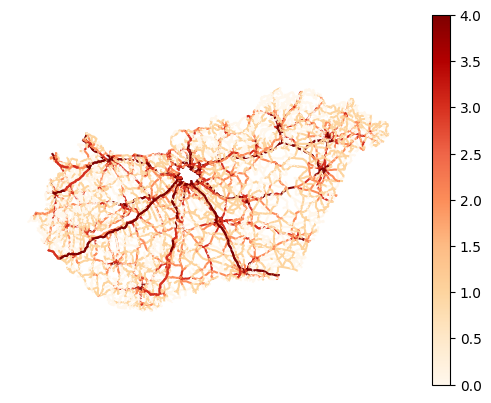

In [9]:
bins = [0, 1000, 4000, 8000, 15000, np.inf]
gdf['anf_bins'] = pd.cut(gdf['anf'], bins, labels=False)

gdf.plot(column='anf_bins', legend=True, cmap='OrRd')
plt.axis('off')

In [10]:
from shapely.geometry import Point

#geo_positions into GeoDataFrame
df = pd.DataFrame({
    'Location': list(geo_positions.keys()),
    'Longitude': [coords[1] for coords in geo_positions.values()],
    'Latitude': [coords[0] for coords in geo_positions.values()]
})
gdf2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

#Set the CRS to WGS84 (epsg:4326), WorldGeodeticSystem84 is the most common coordinate reference system for lat/lon data
gdf2.crs = "EPSG:4326" 
#Conversion: from WGS84 to the CRS of gdf2
gdf2 = gdf2.to_crs(gdf.crs)

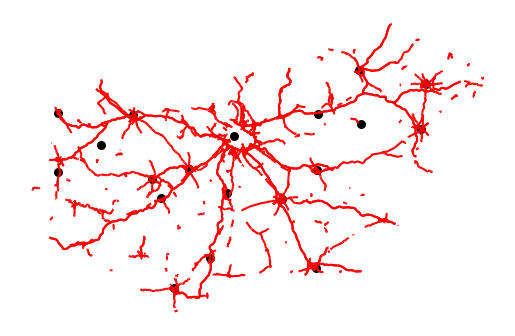

In [ ]:
ax =gdf[gdf['anf']>7000].plot( color='red')
gdf2.plot(ax=ax, color='black', markersize=30)
plt.axis('off')
plt.show()